LOADING LIBRARIES

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


LOADING HISTORICAL STOCK DATA

In [5]:
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470612  129.226052  122.582119  128.613985  112117500
2023-01-04  124.744118  127.014709  123.480487  125.267339   89113600
2023-01-05  123.421265  126.136098  123.164595  125.504283   80962700
2023-01-06  127.962440  128.623871  123.292931  124.398611   87754700
2023-01-09  128.485641  131.703962  128.228972  128.801557   70790800


PREPARE THE DATASET

In [6]:
# Shift Close column to create the target variable
data['Target'] = data['Close'].shift(-1)

# Drop the last row (no target for it)
data = data[:-1]

# Select features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Target']


SPLIT THE DATA

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


TRAIN A MODEL

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

MAKE PREDICTIONS

In [9]:
y_pred = model.predict(X_test)


EVALUATE THE MODEL

In [10]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 4.2902176999706905
R² Score: 0.9852468886522584


PLOT ACTUAL VS PREDICTED

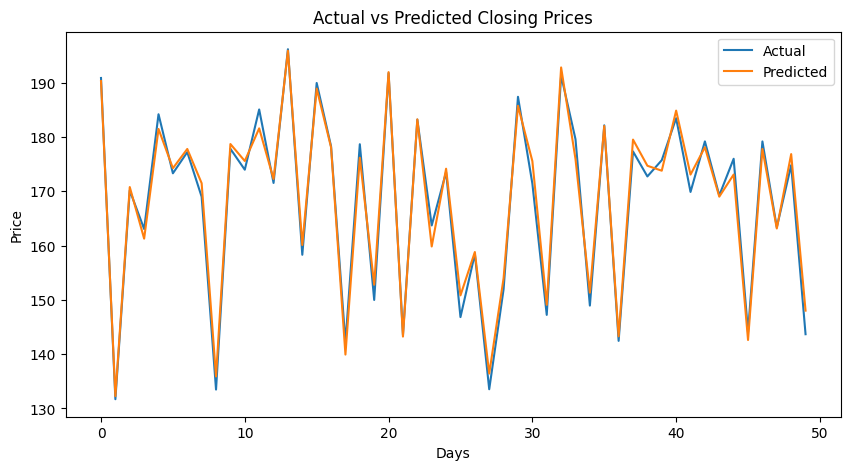

In [11]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
